In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("C:/Users/SOMYA/Downloads/student+performance/student/student-mat.csv")

# Preview data
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (395, 1)


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [3]:
print(df.columns.tolist())

['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3']


In [5]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

In [6]:
df.rename(columns={'g1': 'G1', 'g2': 'G2', 'g3': 'G3'}, inplace=True)

In [7]:
# Check column names
print("Column names:\n", df.columns.tolist())

# Remove any extra spaces from column names
df.columns = df.columns.str.strip()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check if G1, G2, G3 are in columns
if all(col in df.columns for col in ['G1', 'G2', 'G3']):
    # Create average grade column
    df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)

    # Categorize performance
    df['performance'] = df['avg_grade'].apply(lambda x: 'Low' if x < 10 else 'High')
else:
    print("One or more of G1, G2, G3 are missing from the DataFrame")

# Convert binary categorical variables
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'internet', 'romantic']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

# Convert gender
if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'F': 0, 'M': 1})

Column names:
 ['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3']
Missing values:
 school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64
One or more of G1, G2, G3 are missing from the DataFrame


In [9]:
print(df.head())
print(df.columns)

  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                            

In [11]:
df = pd.read_csv("C:/Users/SOMYA/Downloads/student+performance/student/student-mat.csv", sep=';')

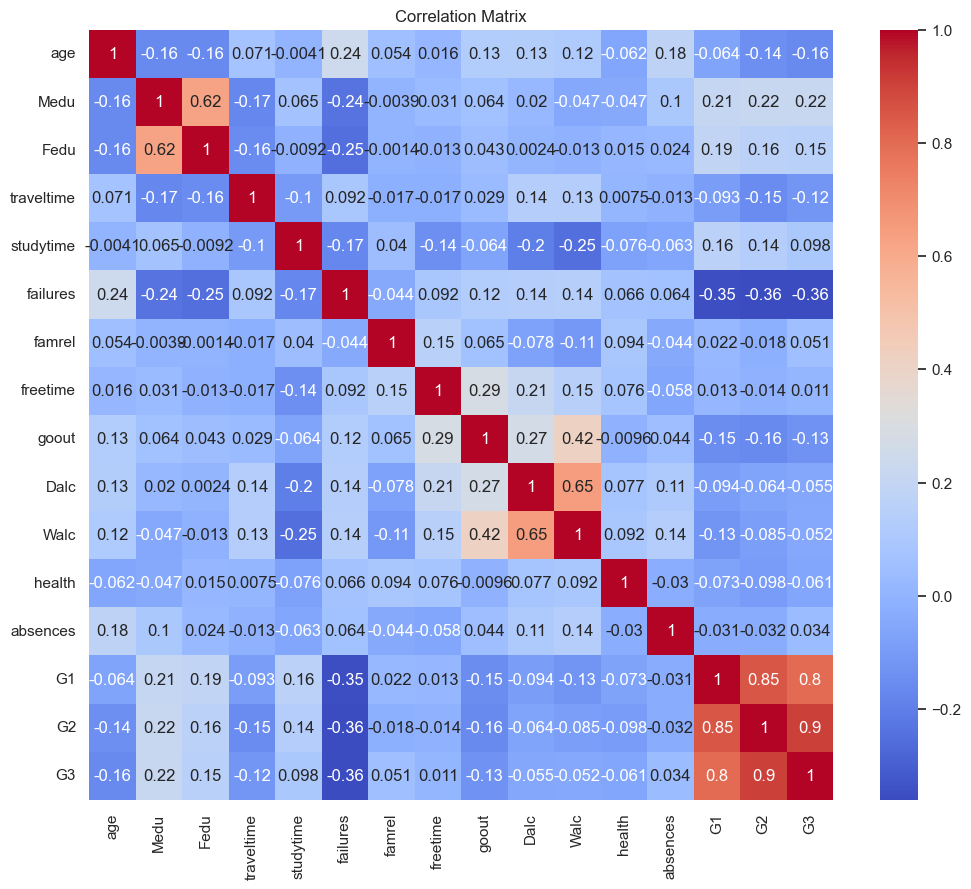

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix only with numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [15]:
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

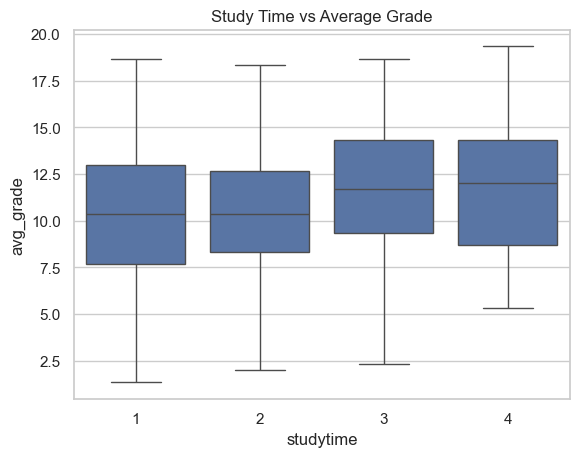

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='studytime', y='avg_grade', data=df)
plt.title("Study Time vs Average Grade")
plt.show()

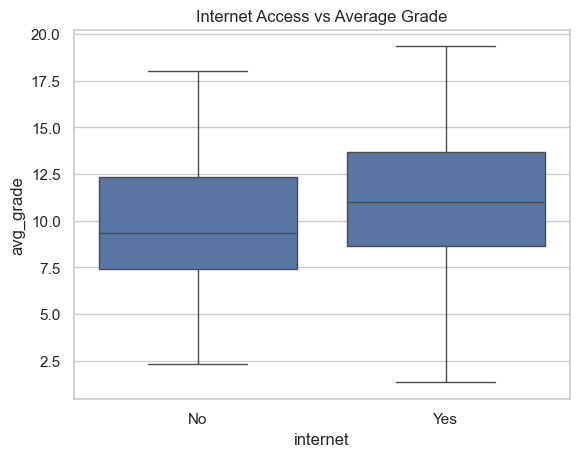

In [17]:
sns.boxplot(x='internet', y='avg_grade', data=df)
plt.title("Internet Access vs Average Grade")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

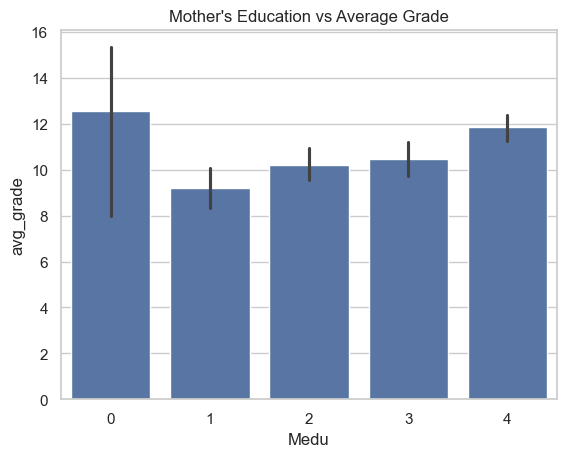

In [18]:
sns.barplot(x='Medu', y='avg_grade', data=df)
plt.title("Mother's Education vs Average Grade")
plt.show()

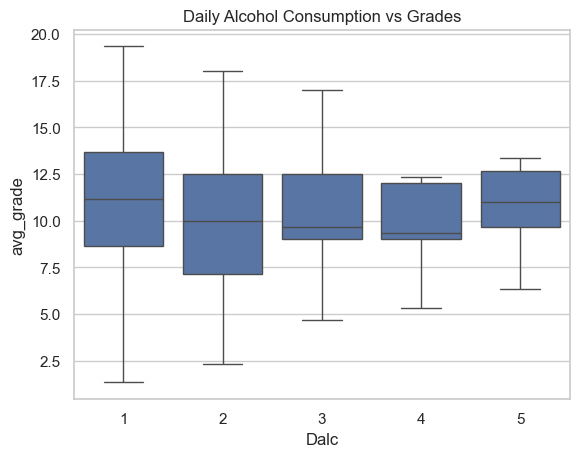

In [19]:
sns.boxplot(x='Dalc', y='avg_grade', data=df)
plt.title("Daily Alcohol Consumption vs Grades")
plt.show()

In [21]:
# Assuming you have 'avg_grade' column in your DataFrame
def categorize_performance(grade):
    if grade >= 80:
        return 'High'
    elif grade >= 60:
        return 'Medium'
    else:
        return 'Low'

df['performance'] = df['avg_grade'].apply(categorize_performance)

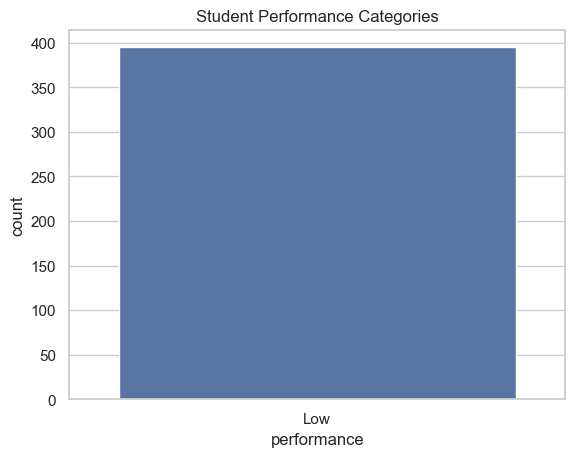

In [22]:
sns.countplot(x='performance', data=df)
plt.title("Student Performance Categories")
plt.show()

In [24]:
df.to_csv("C:/Users/SOMYA/Downloads/student_cleaned.csv", index=False)

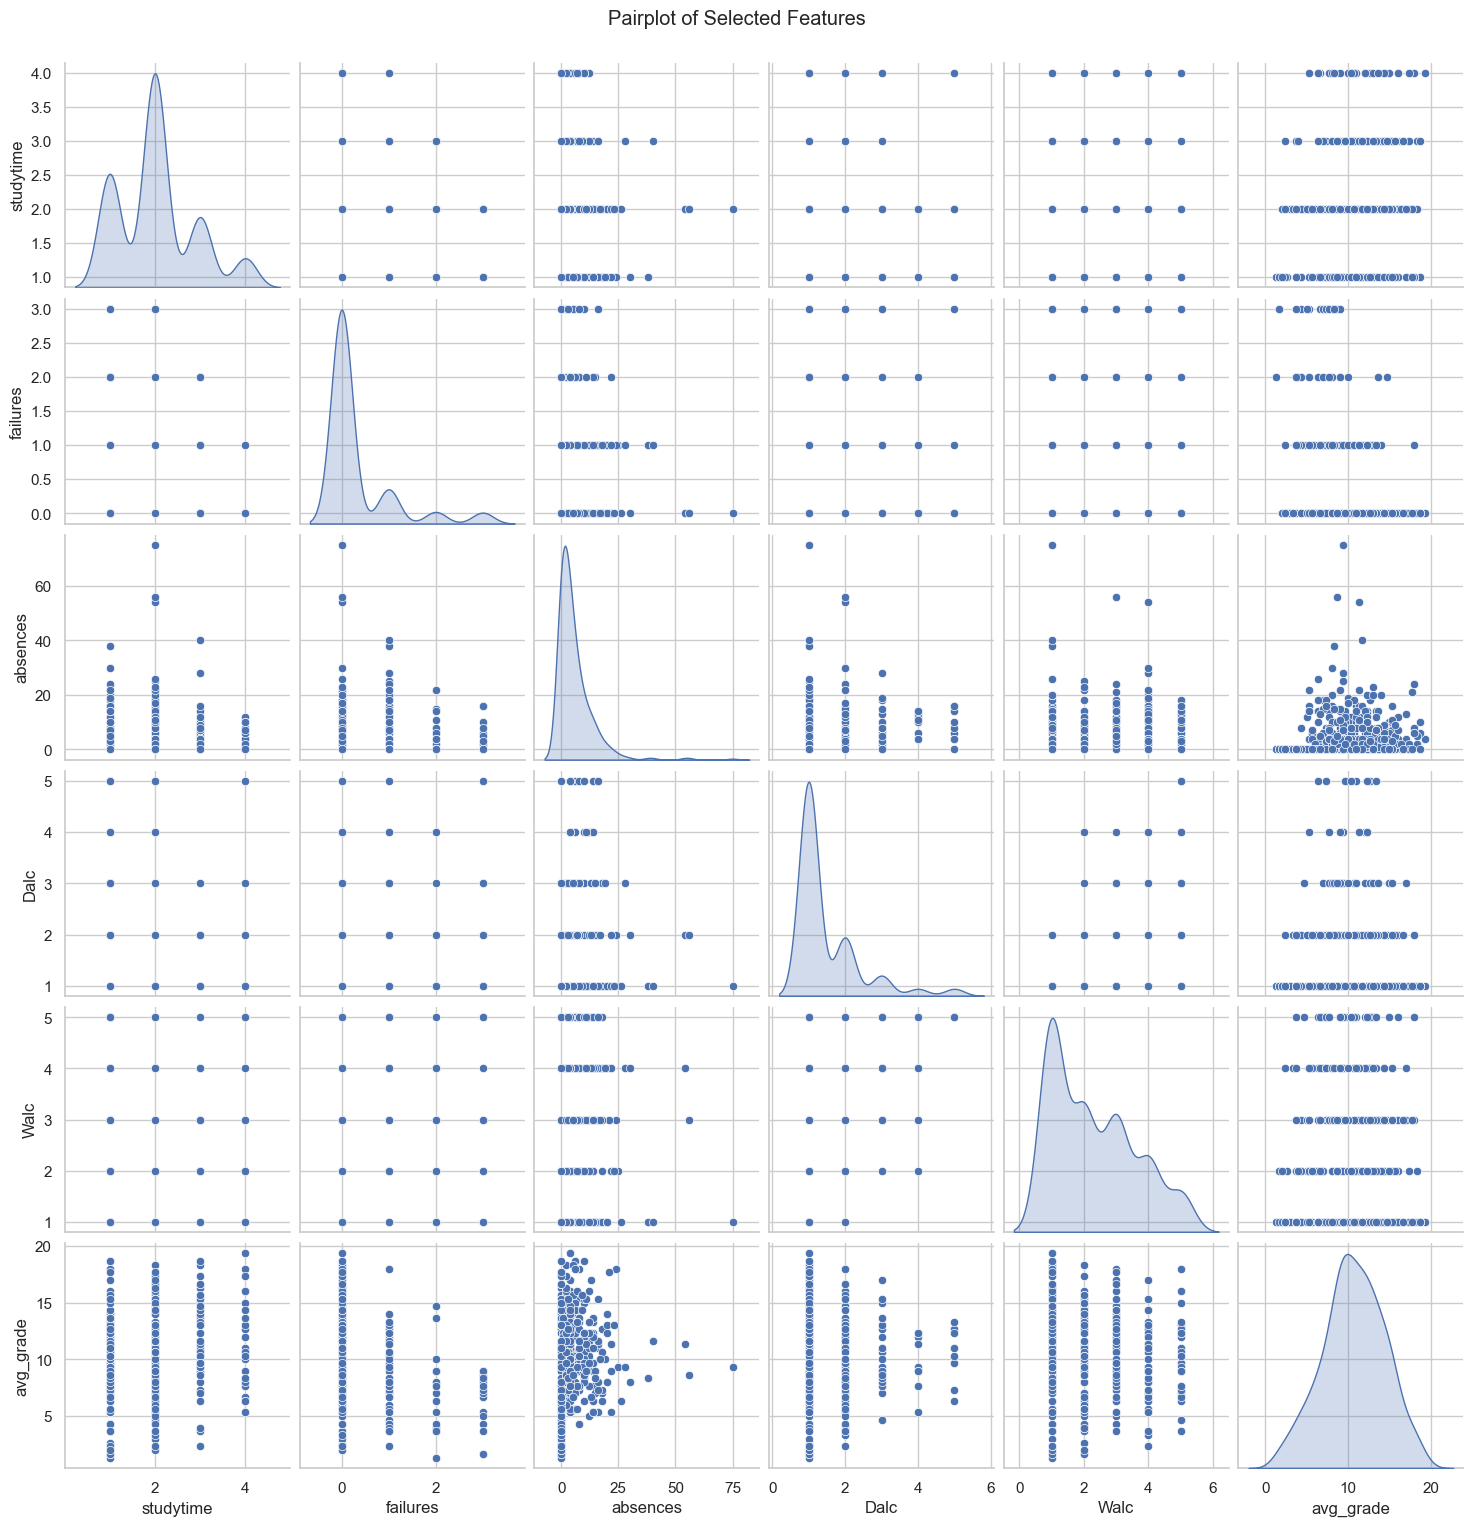

In [26]:
import seaborn as sns

# Select numeric features
features = ['studytime', 'failures', 'absences', 'Dalc', 'Walc', 'avg_grade']

sns.pairplot(df[features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

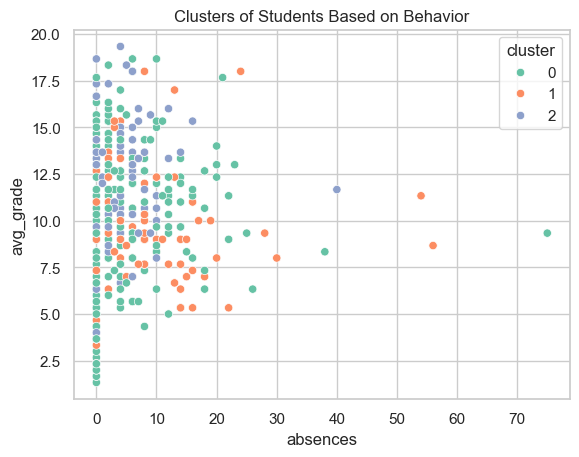

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choose clustering features
cluster_features = df[['studytime', 'failures', 'absences', 'Dalc', 'Walc']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(x='absences', y='avg_grade', hue='cluster', data=df, palette='Set2')
plt.title("Clusters of Students Based on Behavior")
plt.show()

C:\Users\SOMYA\AppData\Local\Temp\ipykernel_9332\557184937.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


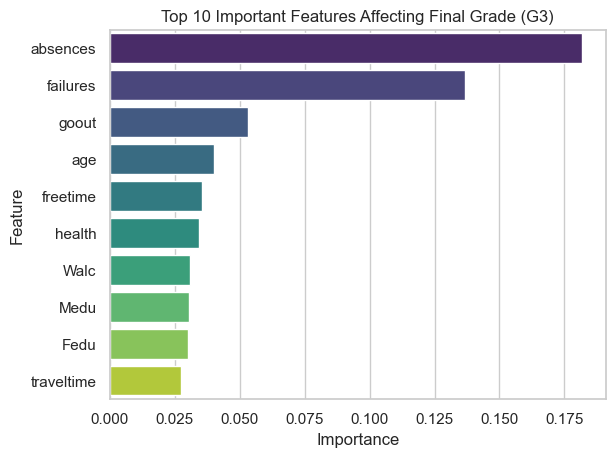

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Drop non-numeric or irrelevant fields
model_df = df.drop(columns=['G1', 'G2', 'G3', 'avg_grade', 'performance'])

# Convert categorical features
model_df = pd.get_dummies(model_df, drop_first=True)

# Define X and y
X = model_df
y = df['G3']

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
features = X.columns

# Plot
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Top 10 Important Features Affecting Final Grade (G3)")
plt.show()

In [34]:
print(df.describe())  # to check score distribution

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [36]:
# Check score distribution
print(df['avg_grade'].describe())

count    395.000000
mean      10.679325
std        3.696786
min        1.333333
25%        8.333333
50%       10.666667
75%       13.333333
max       19.333333
Name: avg_grade, dtype: float64


In [37]:
threshold = df['avg_grade'].median()
df['performance'] = df['avg_grade'].apply(lambda x: 'High' if x >= threshold else 'Low')
print(df['performance'].value_counts())

performance
High    206
Low     189
Name: count, dtype: int64


In [38]:
y_class = df['performance'].map({'Low': 0, 'High': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.3, random_state=42, stratify=y_class
)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Target variable
y_class = df['performance'].map({'Low': 0, 'High': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40 22]
 [ 9 48]]
              precision    recall  f1-score   support

           0       0.82      0.65      0.72        62
           1       0.69      0.84      0.76        57

    accuracy                           0.74       119
   macro avg       0.75      0.74      0.74       119
weighted avg       0.75      0.74      0.74       119



In [4]:
df.to_csv("C:/Users/SOMYA/Downloads/student_cleaned.csv", index=False)